In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#loading the dataset
df=pd.read_csv('../input/eeg-brainwave-dataset-feeling-emotions/emotions.csv')
#showing the dataset
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [6]:
df

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  mean_d_0_a2  \
0          0.411     -15.700       2.060        3.15         2.15   
1          1.680       2.880       3.830       -4.82        25.60   
2          3.360      90.200      89.900        2.03         7.75   
3         -0.284       8.820       2.300       -1.97        17.30   
4         -5.790       3.060      41.400        5.52        26.10   
...          ...         ...         ...         ...          ...   
2127      -2.030       0.647      -0.121       -1.10        33.30   
2128       1.090       4.460       4.720        6.63       -39.40   
2129       6.900      12.700       2.030        4.64        -1.26   
2130       1.580     -16.000       1.690        4.74        20.90   
2131       1.950       6.210       3.490       -3.51        27.50   

      mean_d_1_a2  mean_d_2_a2  mean_d_3_a2  mean_d_4_a2  mean_d_5_a  \
0            29.5       -353.0        14.40         21.5        5.98   
1            32.8         29.6        21.50         17.4       25.50   
2            30.1       -441.0         9.89         25.3      -68.90   
3            32.0       -148.0        20.40         22.8       13.20   
4            34.3         43.7        23.70         20.6       -3.87   
...           ...          ...          ...          ...         ...   
2127         33.4         31.0        32.30         18.6       30.00   
2128         32.5       -287.0       -42.10         19.2       66.40   
2129         27.2       -254.0        12.50         23.1       -8.82   
2130         21.1       -285.0        11.00         18.8       10.50   
2131         32.1         29.8        24.80         31.3       21.60   

      mean_d_6_a  mean_d_7_a  mean_d_8_a  mean_d_9_a  mean_d_10_a  \
0           30.7      -343.0       14.70        27.9        3.170   
1           31.7        31.5       26.20        32.9       31.800   
2           25.3      -481.0      -65.40        20.0       79.800   
3           31.5      -147.0       16.90        27.7       15.700   
4           34.1        43.7      -10.00        22.9       59.400   
...          ...         ...         ...         ...          ...   
2127        33.0        32.6       29.50        29.1       32.000   
2128        29.0      -286.0       64.50        22.0       19.400   
2129        22.4      -275.0       17.10        25.6        0.367   
2130        17.2      -275.0        4.09        28.4       19.500   
2131        30.0        27.7       21.80        30.0       30.000   

      mean_d_11_a  mean_d_12_a  mean_d_13_a  mean_d_14_a  mean_d_15_a  \
0            32.2       -368.0        15.90         36.4         7.08   
1            33.1         33.2        28.50         26.8        32.40   
2            31.0       -408.0        91.90         29.5        18.80   
3            30.7       -142.0        20.70         22.8        13.60   
4            26.7         60.3        64.70         26.9        32.30   
...           ...          ...          ...          ...          ...   
2127         29.9         32.6        28.50         24.9        34.50   
2128         31.1       -280.0    

In [8]:
#all rows through fft_0_b to fft_749_b
sample=df.loc[0,'fft_0_b':'fft_749_b']
sample

fft_0_b     -508.0
fft_1_b      438.0
fft_2_b     -222.0
fft_3_b     -222.0
fft_4_b      438.0
             ...  
fft_745_b   -215.0
fft_746_b    280.0
fft_747_b   -162.0
fft_748_b   -162.0
fft_749_b    280.0
Name: 0, Length: 750, dtype: object

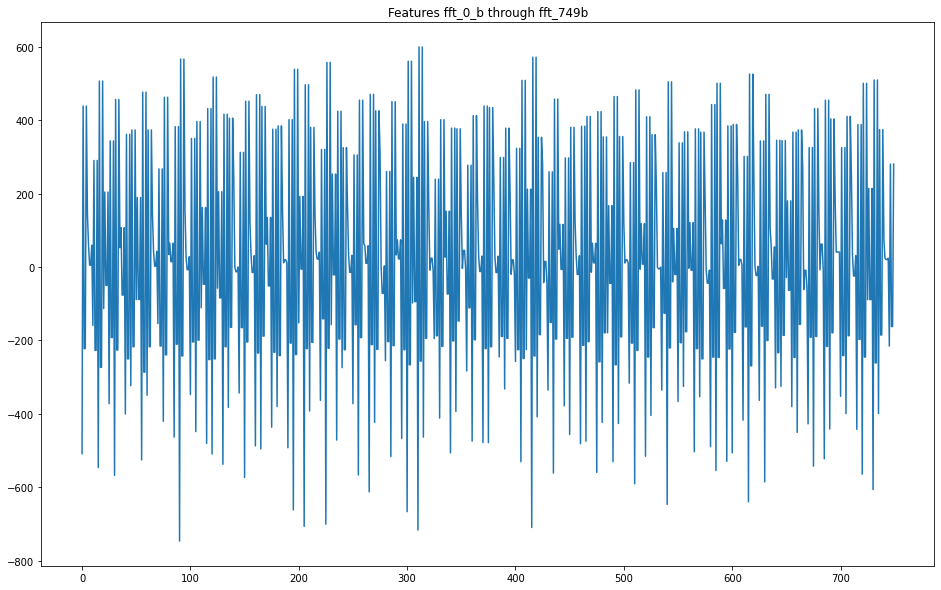

In [10]:
plt.figure(figsize=(16,10))
plt.plot(range(len(sample)),sample)
plt.title('Features fft_0_b through fft_749b')
plt.show()

In [11]:
df['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [14]:
#label_mapping
label_mapping={'NEGATIVE':0,'NEUTRAL':1,'POSITIVE':2}

In [15]:
label_mapping

{'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

# Preprocessing 

In [34]:
def preprocess_inputs(df):
    #copying the dataset
    df=df.copy()
    #storing the label column to a variable
    df['label']=df['label'].replace(label_mapping)
    y=df['label'].copy()
    #storing feature set to x variable
    x=df.drop('label',axis=1).copy()
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    return x_train,x_test,y_train,y_test

In [35]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1492, 2548)
(640, 2548)
(1492,)
(640,)


In [31]:
print(x_train.shape)

(1492, 2548)


In [41]:
#Model
inputs=tf.keras.Input(shape=(x_train.shape[1],))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(3,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                163136    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 167,491
Trainable params: 167,491
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True)
    ])
    

Epoch 1/50
38/38 [==============================] - 3s 55ms/step - loss: 15767887151104.0000 - accuracy: 0.5549 - val_loss: 244033814528.0000 - val_accuracy: 0.4916
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 20941780287488.0000 - accuracy: 0.5507 - val_loss: 8772532568064.0000 - val_accuracy: 0.5686
Epoch 3/50
38/38 [==============================] - 0s 5ms/step - loss: 7637489418240.0000 - accuracy: 0.3998 - val_loss: 5510564151296.0000 - val_accuracy: 0.3278
Epoch 4/50
38/38 [==============================] - 0s 5ms/step - loss: 5181871226880.0000 - accuracy: 0.4853 - val_loss: 3426915975168.0000 - val_accuracy: 0.5518
Epoch 5/50
38/38 [==============================] - 0s 5ms/step - loss: 22779992735744.0000 - accuracy: 0.5314 - val_loss: 8489471574016.0000 - val_accuracy: 0.5217
Epoch 6/50
38/38 [==============================] - 0s 4ms/step - loss: 13552154836992.0000 - accuracy: 0.5591 - val_loss: 269697105920.0000 - val_accuracy: 0.5418


In [53]:
#Results
model_acc=model.evaluate(x_test,y_test,verbose=0)[1]

In [58]:
print('Test Accuracy: {:.3f}%'.format(model_acc*100))

Test Accuracy: 49.219%


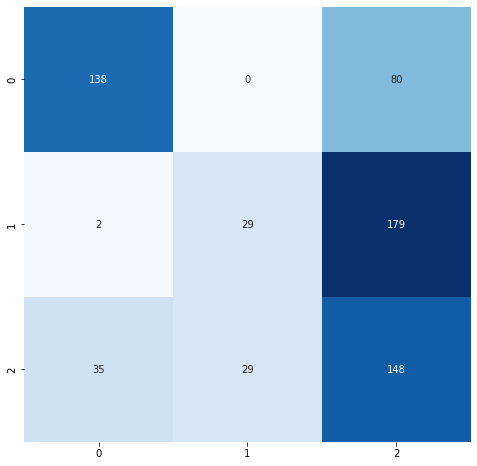

Classification Report: 
----------
               precision    recall  f1-score   support

    NEGATIVE       0.79      0.63      0.70       218
     NEUTRAL       0.50      0.14      0.22       210
    POSITIVE       0.36      0.70      0.48       212

    accuracy                           0.49       640
   macro avg       0.55      0.49      0.47       640
weighted avg       0.55      0.49      0.47       640



In [69]:
y_pred=np.array(list(map(lambda x:np.argmax(x),model.predict(x_test))))
cm=confusion_matrix(y_test,y_pred)
clr=classification_report(y_test,y_pred,target_names=label_mapping.keys())
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,vmin=-0,fmt='g',cbar=False,cmap='Blues')
plt.xticks()
plt.show()

print ('Classification Report: \n----------\n',clr)